### Kaggle Competition | Titanic Machine Learning from Disaster(재난으로부터 타이타닉 기계학습 )

> RMS 타이타닉의 침몰은 역사상 가장 악명 높은 난파 사건 중 하나입니다. 1912년 4월 15일에서 타이타닉은 처음 항해하는 동안 빙산과 충돌하여 2,224 승객과 승무원에서 1502명 사망자를 낸 후 침몰했다. 이 충격적인 비극은 국제 사회에 큰 반향을 일으켰고 선박에 대한 더 나은 안전규칙이 규정되었다.

> 선박 침몰 사건이 많은 생명을 앗아간 이유 중 하나는 승객과 승무원을 위한 충분한 구명정이 준비되지 않았기 때문이다. 침몰 생존에 관여하는 행운의 몇 가지 요소가 있었지만, 여성, 아동, 그리고 상위계층에 있던 사람들과 같은 그룹은 다른 사람보다 생존 할 가능성이 더 높았다.

> 이 대회에서 우리는 어떠한 사람들의 부류가 생존할 가능성이 높은지 분석을 요구합니다. 특히 우리는 이 비극에서 살아있는 승객 예측하는데 있어서 기계학습의 알고리즘을 적용할 것을 요청합니다.

> 이 초심자용 Kaggle 대회는 데이터 과학 및 기계 학습에 많은 경험이 없는 사람들을 위한 이상적인 스타팅 장소를 제공합니다.

 
대회 홈페이지 [homepage](http://www.kaggle.com/c/titanic-gettingStarted).



### 이 Notebook의 목표:

PyData 유틸리티의 전체 요소을 사용하여 파이썬에서 타이타닉 재난의 분석의 간단한 예를 보여줍니다. 이것은 필드에 들어갈 찾는 사람들 또는 현장에서 이미 파이썬으로 수행 분석의 예를 참조하고자하는 사람들을 위해 대상으로합니다.
Show a simple example of an analysis of the Titanic disaster in Python using a full complement of PyData utilities. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Pandas를 이용한 데이터 추가Importing Data with Pandas
*   Data 정리 Cleaning Data
*   Matplotlib를 이용한 시각화를 통하여 데이터 연구 Exploring Data through Visualizations with Matplotlib

#### 데이터분석 Data Analysis
*  지도 기계학습 기술  Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results

#### 분석평가 Valuation of the Analysis
*   지역결과값 평가를 위한 K-folds 교차 검증 K-folds cross validation to valuate results locally
*   IPython 노트북을 이용한 결과값 Output the results from the IPython Notebook to Kaggle



#### Required Libraries:
* [NumPy](http://www.numpy.org/)
* [IPython](http://ipython.org/)
* [Pandas](http://pandas.pydata.org/)
* [SciKit-Learn](http://scikit-learn.org/stable/)
* [SciPy](http://www.scipy.org/)
* [StatsModels](http://statsmodels.sourceforge.net/)
* [Patsy](http://patsy.readthedocs.org/en/latest/)
* [Matplotlib](http://matplotlib.org/)

***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [54]:
import sys
try:
    sys.path.index('/home/moon/KaggleAux')
except:    
    sys.path.append('/home/moon/KaggleAux')

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from kaggleaux.modeling import predict as ka # see github.com/agconti/kaggleaux for more details 이건 따로 설치가 필요함 ㅠㅠ 구찮음

### Data Handling
#### Let's read our data in using pandas:

In [56]:
df = pd.read_csv("data/train.csv") 

Show an overview of our data: 

In [57]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


### 살펴보기 Let's take a look:

위의 내용은 `Pandas` `DataFrame`안의 데이터를 요약한 내용입니다. `DataFrame`은 파이썬의 엑셀 테이블의 워크 플로우의 버전이라고 생각하시면 됩니다. 당신이 볼 수 있듯이 요약 정보의 꽤 보유하고 있습니다. 우리가 여기에 분석 할 수 있는 891개의 관찰값(승객)을 가지고 알 수 있습니다 :

    Int64Index: 891 entries, 0 to 890
Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890
    
다음은 `DataFrame` 모든 열을 표시합니다. 각 열은 우리에게 자신의 `name`,`sex` 또는`age` 같은 각각의 관측값에 대해 뭔가를 알려줍니다. 우리는 이 열들을 데이터셋의 특징이라고 합니다. 당신은 단어 컬럼의 의미를 생각하여 이 노트북으로 교환 할 수 있는 특징들을 생각해야합니다.

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

각 특징들은 그 값들이 여기에 얼마나 많이 포함되는 지 알 수 있습니다. 우리의 대부분의 특징들은 `survived` 특징처럼 모든 전체 데이터를 가지고 있지만 :
After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

`age`와 같은 특징처럼 몇개의 값이 빠진 특징도 존재합니다.  some are missing information, like the `age` feature: 

    age         714  non-null values 

이렇게 누락 값들을을 우리는 `NaN`이라고 표시할 것입니다. These missing values are represented as `NaN`s.

### 누락 값 처리 방법 Take care of missing values:
특징 `ticket`과`cabin`은 많은 누락 된 값을 가지고 있어서 분석에 많은 가치를 추가 할 수가 없습니다. 이 문제를 처리하기 위해 우리는 우리의 데이터셋의 무결성을 유지하기 위해 데이터프레임에서 그들을 삭제합니다.

The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

아래와 같은 코드를 입력하면 그런 특징들을 제거할 수 있습니다.
(제거가 안되고 오류가 뜬다.  new_axis = axis.drop(labels, errors=errors) 흠.... pandas 문서를 찾아보고 해결하는 중
`이미 실행하여 열을 삭제하였던 것이었네..`)

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 

다음 코드를 이용해 `NaN` 값을 남은열에서 제거할 수 있습니다.
While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()


이제 우리는 분석을 위한 준비가 깨끗하고 단정한 데이터셋을 가지고 있습니다. 만약 `ticket`, `cabin` 열을 지우지 않았다면 dropna()가 대부분의 값들을 삭제할 것입니다(아마도 dropna는 NaN이 포함된 전체 행을 다 지우는 것 같다)
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [58]:
#df = df.drop('Ticket', axis=1, inplace =True)
# Remove NaN values
df = df.dropna() 

pandas 데이터 분석을 위한 자료 소개
For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### 데이터를 시각적으로 보자 Let's take a Look at our data graphically:
(아직 matplotlib의 기능은 잘 모르지만 실행된 결과를 보며 코드 내용을 대충 유추할 수 있다)

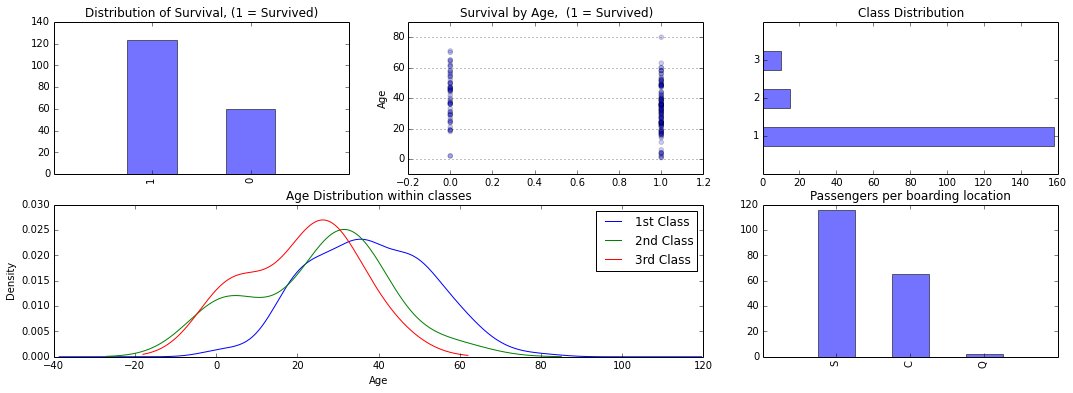

In [59]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

### 시각화 탐색 Exploratory Visualization:

이 대회의 핵심은 개인이 아래와 같은 데이터 특징들을 기반으로 생존 할 가능성을 예측하는 것입니다 :
The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price


살아남을 가능성에 대해 더 나은 이해를 얻을 수 있는지 알아보자
Let’s see if we can gain a better understanding of who survived and died. 

처음으로 생존자와 사망자 막대그래프를 보자
First let’s plot a bar graph of those who Survived Vs. Those who did not.


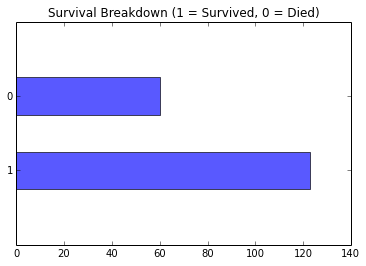

In [60]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### 데이터에서 더 많은 구조를 헤집어 보자 Now let’s tease more structure out of the data,
### 앞선 그래프를 성별에 따라 나눠보자 Let’s break the previous graph down by gender


(-1, 2)

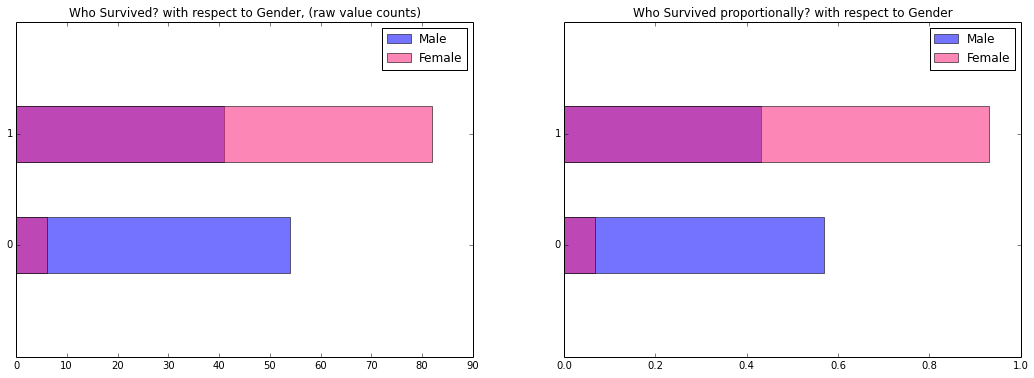

In [61]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

남성이 수가 많기 때문에 사망자와 생존자 모두 여성보다 많지만, 여성이 비율적으로 봤을 때 생존확률이 25% 정도로 남성 20%보다 높은 것을 알 수 있습니다.

Here it’s clear that although more men died and survived in raw value counts, females had a greater survival rate proportionally (~25%), than men (~20%)

#### 훌륭합니다! 하지만 좀더 깊이 들어가 봅시다. Great! But let’s go down even further:
우리는 Pclass를 이용하여 더 많은 구조를 확인할 수 있을까요? 여기서 탑승클래스를 추가해보겠습니다. 3등칸이 가장 낮고 2등, 1등칸 순으로 높아집니다. 성별과 탑승클래스를 이용해 심화해 봅시다.

Can we capture more of the structure by using Pclass? Here we will bucket classes as lowest class or any of the high classes (classes 1 - 2). 3 is lowest class. Let’s break it down by Gender and what Class they were traveling in.


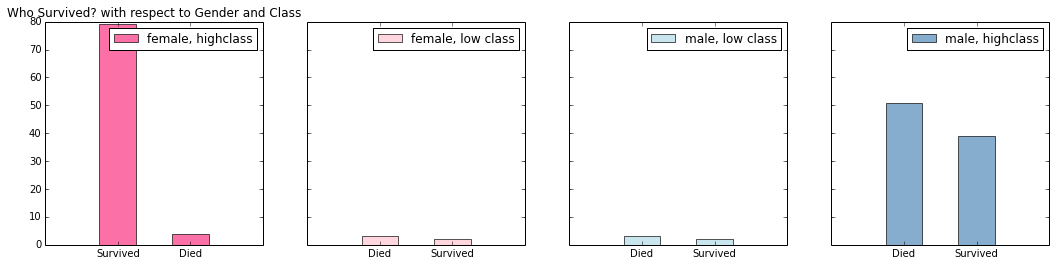

In [62]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

훌륭합니다! 이제 우리는 이 비극에서 살아 남고 죽은 사람에 대한 더 많은 정보가 있습니다. 이 깊은 이해, 우리는 더 나은 더 통찰력있는 모델을 만들어 가고 있습니다. 이것은 인터랙티브 데이터 분석의 일반적인 방법입니다. 첫째로 당신은 작은 부분에서 시작하여 가장 기본적인 관계를 이해하고 당신이 작업중인 데이터에 대한 더 많은 발견으로 천천히 분석의 복잡성을 증가시킵니다. 지금까지 분석에 대한 프로세스의 진행을 모아논 값은 다음과 같습니다.

Awesome! Now we have a lot more information on who survived and died in the tragedy. With this deeper understanding, we are better equipped to create better more insightful models. This is a typical process in interactive data analysis. First you start small and understand the most basic relationships and slowly increment the complexity of your analysis as you discover more and more about the data you’re working with. Below is the progression of process laid out together:

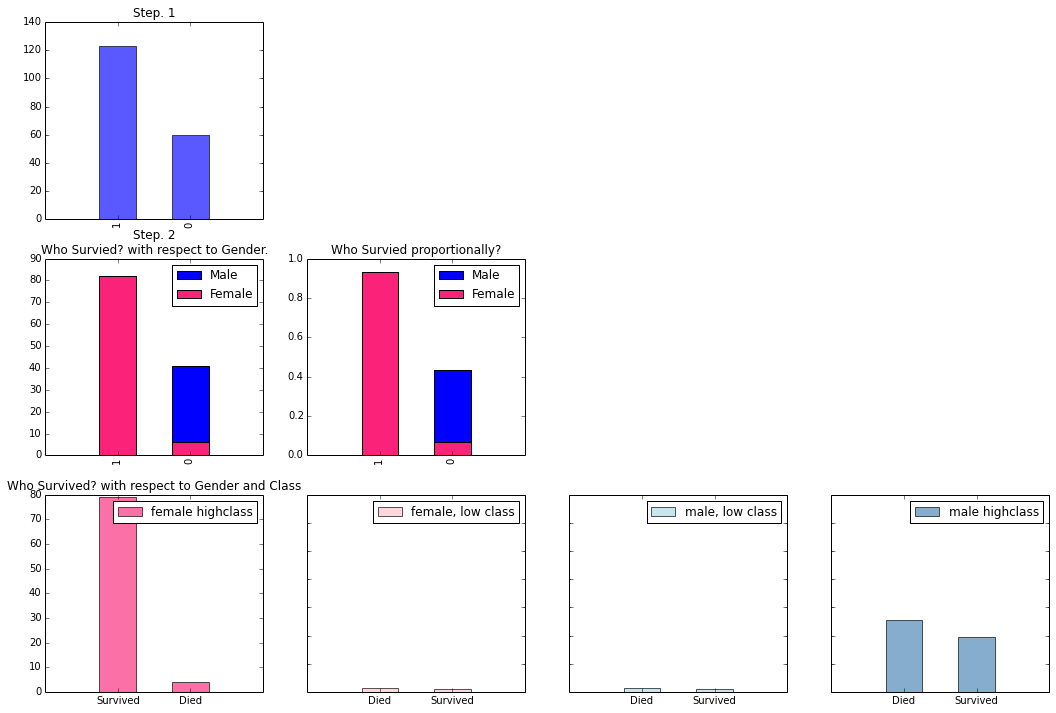

In [63]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.Survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.Survived[df.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.Survived[df.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='bar',label='Male')
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

matplotlib에 대한 자료 링크

I've done my best to make the plotting code readable and intuitive, but if you’re looking for a more detailed look on how to start plotting in matplotlib, check out this beautiful notebook [here](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). 

이제 우리는 우리가 예측하기 위해 시도하고 있는 기본적인 이해를 가지고, 분석을 해보겠습니다.

Now that we have a basic understanding of what we are trying to predict, let’s predict it.

## 지도 기계학습 Supervised Machine Learning
#### 로지스틱 회귀분석 Logistic Regression:
## Supervised Machine Learning
#### Logistic Regression:

다음은 위키피디아에서 로지스틱 회귀분석에 대한 설명입니다.
(로지스틱 회귀분석은 output의 값이 0 또는 1과 같이 descreate 할 때 사용하는 회귀방법임. 위 예제처럼 생존 또는 사망과 같이 이진 경우에 사용함)
As explained by Wikipedia:
>In statistics, logistic regression or logit regression is a type of regression analysis used for predicting the outcome of a categorical dependent variable (a dependent variable that can take on a limited number of values, whose magnitudes are not meaningful but whose ordering of magnitudes may or may not be meaningful) based on one or more predictor variables. That is, it is used in estimating empirical values of the parameters in a qualitative response model. The probabilities describing the possible outcomes of a single trial are modeled, as a function of the explanatory (predictor) variables, using a logistic function. Frequently (and subsequently in this article) "logistic regression" is used to refer specifically to the problem in which the dependent variable is binary—that is, the number of available categories is two—and problems with more than two categories are referred to as multinomial logistic regression or, if the multiple categories are ordered, as ordered logistic regression.
Logistic regression measures the relationship between a categorical dependent variable and one or more independent variables, which are usually (but not necessarily) continuous, by using probability scores as the predicted values of the dependent variable.[1] As such it treats the same set of problems as does probit regression using similar techniques.

#### 정말 설명하고 싶은 정보 The skinny, as explained by yours truly:

우리의 대회는 이진 결과를 예측하기를 원합니다. 즉, 일부는 죽을수도 있고(0으로 표시),일부는 생존(1로 표시)합니다. 아이디어의 좋은 시작점은 각 사람들이 0이 될 지 1이 될지 확률을 구하는 것입니다. 우리는 이미 알려진 정보들을 이용하여 어떤 사람이 살아있을 확률을 알 수 있을 것입니다. 만약 그런 작업을 하였다면, 다음 그래프와 같은 결과를 얻을 것입니다 ::

Our competition wants us to predict a binary outcome. That is, it wants to know whether some will die, (represented as a 0), or survive, (represented as 1). A good place to start is to calculate the probability that an individual observation, or person, is likely to be a 0 or 1. That way we would know the chance that someone survives, and could start making somewhat informed perdictions. If we did, we'd get results like this:: 

![pred](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob.png) 

(Y축은 그 사람의 생존 확률을 의미하고, X축은 1~891까지의 승객의 번호를 의미합니다)
(*Y axis is the probability that someone survives, X axis is the passenger’s number from 1 to 891.*)

이 정보가 유용하지만 그것은 어떤 사람의 생사 여부를 말해주는 것은 아닙니다. 그것은 단지 그들의 생존 또는 사망 확률을 알 수 있을 뿐입니다. 우리는 여전히 우리가 알고자 하는 이진 결정에 맞게 이러한 확률의 의미를 해석해야 합니다. 하지만 어떻게 해야되나요? 우리는 임의적으로 우리의 생존에 대한 임계치를 어떤 사람이 생존확률을 50 % 이상 가지고 있을 때라고 정할 수 있을 것입니다. 사실, 이러한 전략은 실제로 데이터를 꽤 잘 수행 할 것입니다. 그리고 당신은 상당히 정확한 예측을 할 수 있습니다. 그래프로 보면 다음과 같을 것입니다 :

While that information is useful it doesn’t let us know whether someone ended up alive or dead. It just lets us know the chance that they will survive or die. We still need to translate these probabilities into the binary decision we’re looking for. But how? We could arbitrarily say that our survival cutoff is anyone with a probability of survival over 50%. In fact, this tactic would actually perform pretty well for our data and would allow you to make decently accurate predictions. Graphically it would look something like this:

![predwline](https://raw.github.com/agconti/kaggle-titanic/master/images/calc_prob_wline.png)

만약 당신이 내기를 좋아한다면, 당신은 모든 것을 우연에 맡기는 것을 좋아하지 않을 것입니다. 확률 50%에서 생존여부를 설정하는 것은 무슨 의미가 있겠습니까? 아마 20% 또는 80 %가 더 잘 작동할 수도 있을 것입니다. 분명히 우리는 컷오프를 만들기 위해 더 정확한 방법이 필요합니다. 이 단계에서 ** 로지스틱 회귀 ** 방법을 사용할 것입니다.

If you’re a betting man like me, you don’t like to leave everything to chance. What are the odds that setting that cutoff at 50% works? Maybe 20% or 80% would work better. Clearly we need a more exact way to make that cutoff. What can save the day? In steps the **Logistic Regression**. 

로지스틱 회귀는 수학적으로 컷오프 또는 결정범위를 자동으로 계산해 줄 것입니다. 그것을 알아낼 수 있는이 방법은 가장 정확하게 학습 데이터를 나타내지는 값을 사용하는 것입니다. 여기서는 아마도 50%  또는 51.84%에서 컷오프를 설정할 것입니다.

A logistic regression follows the all steps we took above but mathematically calculates the cutoff, or decision boundary (as stats nerds call it), for you. This way it can figure out the best cut off to choose, perhaps 50% or 51.84%, that most accurately represents the training data.

아래의 세개의 노트북 셀에서는 로지스틱 회귀 모델을 생성하고 데이터를 학습하고 정확도를 측정할 것입니다.

The three cells below show the process of creating our Logitist regression model, training it on the data, and examining its performance. 

첫째 셀에서는 우리는 로지스틱 회귀모델을 정의하고, 다음 셀에서는 데이터 입력값의 종류에 따라 모델에 맞는 데이터프레임을 설계할 것입니다. 마지막 셀에서는 그래프로 그려서 데이터모델의 구조를 확인하고 우리가 예측한 값과 실제 값을 이용하여 잔차를 비교해 볼 것입니다.

First, we define our formula for our Logit regression. In the next cell we create a regression friendly dataframe that sets up boolean values for the categorical variables in our formula and lets our regression model know the types of inputs we're giving it. The model is then instantiated and fitted before a summary of the model's performance is printed. In the last cell we graphically compare the predictions of our model to the actual values we are trying to predict, as well as the residual errors from our model to check for any structure we may have missed.

In [64]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 

In [65]:
# create a regression friendly dataframe using patsy's dmatrices function
y,x = dmatrices(formula, data=df, return_type='dataframe')

# instantiate our model
model = sm.Logit(y,x)

# fit our model to the training data
res = model.fit()

# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.441774
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                            7
Date:                Fri, 12 Feb 2016   Pseudo R-squ.:                  0.3017
Time:                        14:48:41   Log-Likelihood:                -80.845
converged:                       True   LL-Null:                       -115.78
                                        LLR p-value:                 1.574e-12
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.2584      0.808      5.270      0.000         2.675     5.842
C(Pclass)[T.2]      -0.0369      0.800     -0.046      0.963        -1.604     1.530
C(Pclass)[T.3]      -1.6803      0.941     -1.786      0.074        -3.524     0.164
C(Sex)[T.male]      -2.8523      0.493     -5.781      0.000        -3.819    -1.885
C(Embarked)[T.Q]    -1.6483      1.944     -0.848      0.396        -5.458     2.161
C(Embarked)[T.S]    -0.4286      0.426     -1.007      0.314        -1.263     0.406
Age                 -0.0357      0.014     -2.571      0.010        -0.063    -0.008
SibSp                0.1272      0.348      0.366      0.715        -0.555     0.809
====================================================================================
"""

In [66]:
x

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp
1,1,0,0,0,0,0,38.0,1
3,1,0,0,0,0,1,35.0,1
6,1,0,0,1,0,1,54.0,0
10,1,0,1,0,0,1,4.0,1
11,1,0,0,0,0,1,58.0,0
21,1,1,0,1,0,1,34.0,0
23,1,0,0,1,0,1,28.0,0
27,1,0,0,1,0,1,19.0,3
52,1,0,0,0,0,0,49.0,1
54,1,0,0,1,0,0,65.0,0


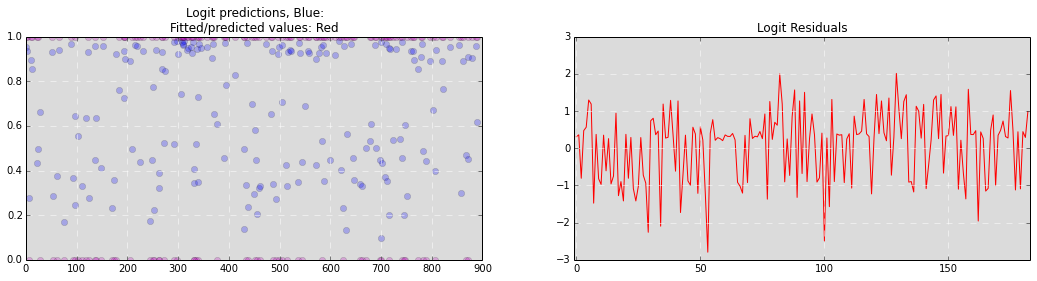

In [67]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(x)
plt.plot(x.index, ypred, 'bo', x.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

## 작업 결과 살펴보기 So how well did this work?
그래프를 이용해 예측치를 살펴보겠습니다.

Lets look at the predictions we generated graphically:

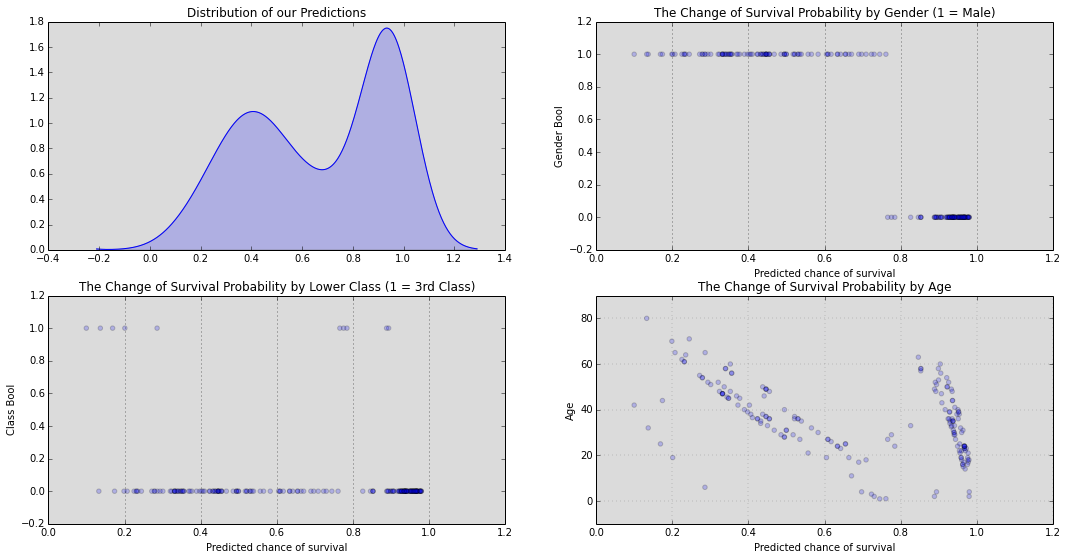

In [68]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(res.predict(),x['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224, axisbg="#DBDBDB")
plt.scatter(res.predict(),x.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

### Now lets use our model to predict the test set values and then save the results so they can be outputed to Kaggle
### Read the test data

In [69]:
test_data = pd.read_csv("data/test.csv")

### Examine our dataframe

In [70]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### TEST 데이터를 모델의 독립변수에 추가합니다(캐글에서는 종속변수는 비워져있습니다)
Add our independent variable to our test data. (It is usually left blank by Kaggle because it is the value you are trying to predict.)

In [71]:
test_data['Survived'] = 1.23

버려졌던 결과 데이터 Our binned results data:

In [72]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1.23
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.23
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1.23
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1.23
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.23
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1.23
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1.23
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,1.23
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1.23
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,1.23


In [73]:
results 

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0x7efc001c2290>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)']}

In [74]:
# Use your model to make prediction on our test set. 
compared_resuts = ka(test_data, results, 'Logit')
compared_resuts = Series(compared_resuts)  # convert our model to a series for easy output

In [75]:
# output and submit to kaggle
compared_resuts.to_csv("data/logitregres.csv")

### 캐글 결과는 RMSE=0.77033이다. 이 결과는 꽤 괜찮은 편이다 음훼훼

Results as scored by Kaggle: RMSE = 0.77033  That result is pretty good. ECT ECT ECT

In [76]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

### 서포트벡터머신 Support Vector Machine (SVM)

* "음.... 직선만으로는 부족해.."*
*"So uhhh, what if a straight line just doesn’t cut it."*

**Wikipeda:**
>In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data and recognize patterns, used for classification and regression analysis. The basic SVM takes a set of input data and predicts, for each given input, which of two possible classes forms the output, making it a non-probabilistic binary linear classifier. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples into one category or the other. An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall on.
In addition to performing linear classification, SVMs can efficiently perform non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

## 작가의 혼잣말 From me
(원 글쓴이는 로지스틱 모델은 그럭저럭 괜찮지만 선형모델만으로는 복잡한 생존문제를 결정하는데 문제가 있을것이라고 생각한다. 그래서 선형 결정 모델을 보완할 다른 수학적인 모델이 필요하다고 말하고 있다)

The logit model we just implemented was great in that it showed exactly where to draw our decision boundary or our 'survival cut off'.  But if you’re like me, you could have thought, "So uhhh, what if a straight line just doesn’t cut it". A linear line is okay, but can we do better? Perhaps a more complex decision boundary like a wave, circle, or maybe some sort of strange polygon would describe the variance observed in our sample better than a line.  Imagine if we were predicating survival based on age. It could be a linear decision boundary, meaning  each additional time you've gone around the sun you were 1 unit more or less likely to survive. But I think it could be easy to imagine some sort of curve, where a young healthy person would have the best chance of survival, and sadly the very old and very young a like: a poor chance. Now that’s a interesting question to answer. But our logit model can only evaluate a linear decision boundary. How do we get around this? With the usual answer to life the universe and everything;  $MATH$. 

**The answer:**
로지스틱 모델을 수식을 표현하면 다음과 같다

We could transform our logit equation from expressing a linear relationship like so:

$survived  = \beta_0 + \beta_1pclass + \beta_2sex + \beta_3age + \beta_4sibsp + \beta_5parch + \beta_6embarked$


간단하게 표기하면 다음과 같은 말이다

Which we'll represent for convenience as: 
$y = x$
		

이러한 일차적인 선형 모델을 비선형모델로 표기하려면 다음과 같이 로그를 씌운다

to a expressing a linear expression of a non-linear relationship: 
$\log(y) = \log(x)$

이런식으로 우리는 비선형 관계를 만들 수 있다

By doing this we're not breaking the rules. Logit models are *only* efficient at modeling linear relationships, so we're just giving it a linear relationship of a non-linear thing. 

쉬운 방법으로  $x^3$ 그래프를 사용한다.

An easy way to visualize this by looking at a graph an exponential relationship. Like the graph of $x^3$:

![x3](https://raw.github.com/agconti/kaggle-titanic/master/images/x3.png)

Here its obvious that this is not linear. If used it as an equation for our logit model, $y = x^3$; we would get bad results. But if we transformed it by taking the log  of our equation, $\log(y) = \log(x^3)$. We would get a graph like this:

![loglogx3](https://raw.github.com/agconti/kaggle-titanic/master/images/loglogx3.png)

That looks pretty linear to me. 

이러한 과정은 좀더 정확하게 분류를 하게 해준다. 좀 더 깊은 수학적인 지식은 아래 링크를 참조하면 된다.
(http://dustwell.com/PastWork/IntroToSVM.pdf)
아래 셀들은  SVM 모델을 구현하고 SVM이 세 가지 수학적 평면에 앞선 식을 변환 한 후 그 결과를 검사하는 과정이다. 
첫 번째 셀은 선형이며, 우리의 논리 모델과 유사하다. 다음은 지수, 다항식, 변환 그리고 마지막으로 공백 변환입니다.


This process of transforming models so that they can be better expressed in a different mathematical plane is exactly what the Support Vector Machine does for us. The math behind how it does that is not trivial, so if your interested; put on your reading glasses and head over [here](http://dustwell.com/PastWork/IntroToSVM.pdf). Below is the process of implementing a SVM model and examining the results after the SVM transforms our equation into three different mathematical plains. The first is linear, and is similar to our logic model. Next is an exponential, polynomial, transformation and finally a blank transformation.


/usr/lib/pymodules/python2.7/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


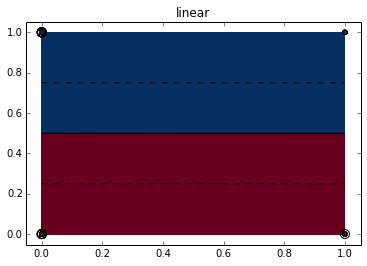

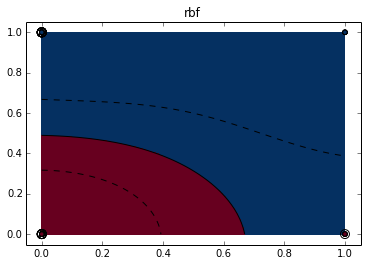

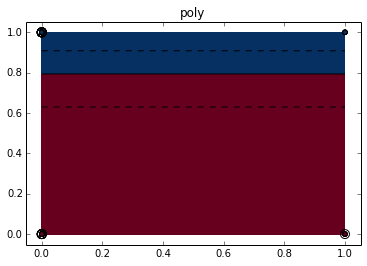

In [77]:
# set plotting parameters
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=df, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
nighty_precent_of_sample = int(.9 * n_sample)
X_train = X[:nighty_precent_of_sample]
y_train = y[:nighty_precent_of_sample]
X_test = X[nighty_precent_of_sample:]
y_test = y[nighty_precent_of_sample:]

# create a list of the types of kerneks we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

읽기에 사람이하지 않았다 동안 파란색의 모든 값은 살아 남았다. 선형 변환에 대한 그래프를 점검 하자. 선형 그래프는 50%에서 결정 경계을 만든다! 이전에 밝혀졌듯이 그러한 가정은 꽤 괜찮습니다. 당신이 볼 수 있듯이, 나머지 결정 경계는 원래의 선형 결정 경계보다 훨씬 더 복잡합니다. 이러한 보다 복잡한 경계는 데이터셋에 대한 많은 구조를 기억 할 수 있고, 그래서 더 강력한 예측 모델을 만들 수 있습니다.

당신이 좋아하는 결정 경계를 선택하여 아래의 코드를 조정하고, Kaggle에 결과를 제출해보면 얼마나 잘 작동하는지 알 수 있을 것입니다!


Any value in the blue survived while anyone in the read did not. Checkout the graph for the linear transformation. It created its decision boundary right on 50%! That guess from earlier turned out to be pretty good.  As you can see, the remaining decision boundaries are much more complex than our original linear decision boundary. These more complex boundaries may be able to capture more structure in the dataset, if that structure exists, and so might create a more powerful predictive model.

Pick a decision boundary that you like, adjust the code below, and submit the results to Kaggle to see how well it worked!

In [80]:
# Here you can output which ever result you would like by changing the Kernel and clf.predict lines
# Change kernel here to poly, rbf or linear
# adjusting the gamma level also changes the degree to which the model is fitted
clf = svm.SVC(kernel='poly', gamma=3).fit(X_train, y_train)                                                            
y,x = dmatrices(formula_ml, data=test_data, return_type='dataframe')

# Change the interger values within x.ix[:,[6,3]].dropna() explore the relationships between other 
# features. the ints are column postions. ie. [6,3] 6th column and the third column are evaluated. 
res_svm = clf.predict(x.ix[:,[6,3]].dropna()) 

res_svm = DataFrame(res_svm,columns=['Survived'])
res_svm.to_csv("data/svm_poly_63_g10.csv") # saves the results for you, change the name as you please. 

### Random Forest

"음 선형 및 결정 경계를 이용한 방법이 전혀 먹히지 않을 경우엔 어떻게 해야될나.."

"Well, What if this line / decision boundary thing doesn’t work at all."

**위키피디아는 항상 우리에게 명확한 답을 줍니다**
(간단하니까 번역)
> 랜덤포레스트 방법은 앙상블 분류 학습 방법입니다. 그것은 다수의 decision tree 방법으로 구성되어져 각각의 tree에서 나온 분류 값을 섞으면서 동작하게 됩니다. 

**Wikipedia, crystal clear as always:**
>Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.


** 다시 한 번, 이 정보가 중요한 이유**

**Once again, the skinny and why it matters to you:**

우리가 지금까지 만든 그럴듯한 코드라인들을 하나로 통합하는데 회의적인 당신한테 랜덤포레스트라는 다른 선택권이 있습니다. 이러한 기술은 우리가 위에서 만든 모든 방정식을 이용한 방법들과는 다르게 매개변수가 없는 모델링 방법입니다. 이 방법은 적은 컴퓨터 자원을 소모하고 뛰어난 통계적인 관찰로 데이터로부터 구조를 끄집어냅니다.

There are always skeptics, and you just might be one about all the fancy lines we've created so far. Well for you, here’s another option; the Random Forest. This technique is a form of non-parametric modeling that does away with all those equations we created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

포레스트 알고리즘 작동에 대해서 작은 사탕 항아리을 이용해 설명하겠습니다. 우리는 모두 그 항아리에 얼마나 많은 한 사탕이 있는지 추측합니다. 그리고 우리 중 하나가 그것을 정확히 맞추는 것은 쉬운 일은 아닐 것입니다. 흥미롭게도 개개인의 추측은 틀릴 수 있지만, 충분히 많은 모든 추측의 평균은 일반적으로 항아리의 사탕 실제 수에 아주 가까이 나옵니다. 이 아이디어는 랜덤포레스트의 영리한 통계적인 관측을 말합니다.

An anecdote to explain how this the forest works starts with the lowly gumball jar. We've all guess how many gumballs are in that jar at one time or another, and odds are not a single one of us guessed exactly right. Interestingly though, while each of our individual guesses for probably were wrong, the average of all of the guesses, if there were enough, usually comes out to be pretty close to the actual number of gumballs in the jar. Crazy, I know.  This idea is that clever statistical observation that lets random forests work.

**어떻게 알고리즘은 작동하나요?**

랜덤포레스트 알고리즘이 무작위로 데이터의 임의 하위 섹션에서 관찰 된 분산을 설명하기 위해 많은 매우 간단한 모델을 생성합니다. 이 모델은 우리의 사탕에 대한 추측과도 같다. 그러한 추측은 개별적으로 모두 좋지 못합니다. 하지만 그것들의 평균을 구하게 되면, 강력한 예측 도구가 될 수 있습니다. 평균화 과정이 이 과정의 핵심이다. 

이 각각의 과반수 모델들은 많이 안습이지만 각 모델들의 나쁜 예측치는 서로 상쇄를 하게 된다. 그래서 나쁜 예측치들을 평균내면 그것은 0이 된다. 그렇게 해서 남은 모델들을 가지고 데이터의 진짜 구조를 파악하게 된다.

아래 셀들은 랜덤포레스트를 피팅하고, 예측 결과 모델을 만들고, 결과를 기록한다.

 
**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data.  These models are like our gumball guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.
The cell below shows the process of instantiating and fitting a random forest, generating predictions form the resulting model, and then scoring the results.

In [81]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

Mean accuracy of Random Forest Predictions on the data was: 0.989071038251



랜덤포레스트는 thumb wave보다 조금 나은 성능을 보이고 있다. 의미 당신 임의로 당신이 평균에 거의 잘 할 것이다 아래로 엄지 손가락을 흔들며하여 1과 0을 할당합니다. 이번에는 우리 랜덤 포레스트 데이터의 실제 구조에 우연히 않았다 보인다.2


Our random forest performed only slightly better than a thumb wave, meaning that if you randomly assigned 1s and 0s by waving your thumb up and down you would do almost as well on average. It seems that this time our random forest did not stumble on the true structure of the data. 

These are just a few of the machine learning techniques that you can apply. Try a few for yourself and move up the leader board!

Ready to see more an example of a more advanced analysis? Check out these notebooks:

* [Kaggle Competition | Blue Book for Bulldozers Quantitative Model](http://nbviewer.ipython.org/github.com/agconti/AGC_BlueBook/master/BlueBook.ipynb#)
* [GOOG VS AAPL Correlation Arb](http://nbviewer.ipython.org/github.com/agconti/AGCTrading/master/GOOG%2520V.%2520AAPL%2520Correlation%2520Arb.ipynb)
* [US Dollar as a Vehicle Currency; an analysis through Italian Trade](https://github.com/agconti/US_Dollar_Vehicle_Currency)
        
#### Follow me on [github](https://github.com/agconti), and [twitter](https://twitter.com/agconti) for more books to come soon!
